# Bispectrum BAO

In [7]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

In [3]:
from pkglam import read, get_cov

In [4]:
pk = read('/mnt/data1/BispectrumGLAM/output/pkr_0114.npz')
bk = read('/mnt/data1/BispectrumGLAM/output/bkr_0114.npz')

In [5]:
kmin = 0.10
kmax = 0.17

# power spectrum
cov_pk = get_cov(pk[0], pk[2], pk[1], kmax=kmax, kmin=kmin)

# bispectrum
cov_bk = get_cov(bk[0], bk[2], bk[1], kmax=kmax, kmin=kmin)

kmax=0.17, kmin=0.1, nbins=7, nmocks=922
hartlap factor: 1.009
kmax=0.17, kmin=0.1, nbins=84, nmocks=957
hartlap factor: 1.098


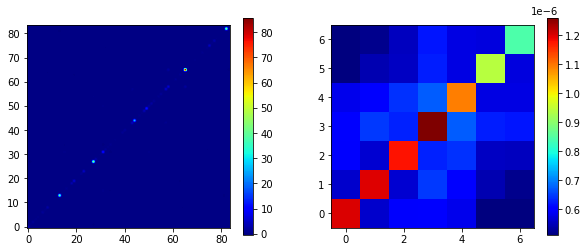

In [10]:
fg, ax = plt.subplots(ncols=2, figsize=(10, 4))

kw = dict(origin='lower', cmap='jet')
m1 = ax[0].imshow(cov_bk, **kw)
fg.colorbar(m1, ax=ax[0])
m2 = ax[1].imshow(cov_pk, **kw)
fg.colorbar(m2, ax=ax[1])

In [3]:
chi2 = np.loadtxt('chi2_pk.txt')

In [4]:
chi2.shape

(201, 2)

Text(0.5, 0, 'alpha')

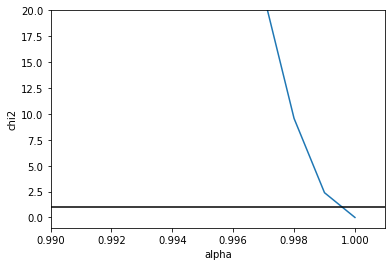

In [12]:
plt.plot(chi2[:, 0], chi2[:, 1])
plt.xlim(0.99, 1.001)
plt.ylim(-1, 20)
plt.axhline(1.0, color='k')
plt.ylabel('chi2')
plt.xlabel('alpha')

In [3]:
def read_bispectrum(filename):

    d = open(filename, 'r')
    lines = d.readlines()

    bispectrum = []
    for line in lines:
        kx, ky, kz, b = map(float, line.split('\t'))
        bispectrum.append([kx, ky, kz, b])

    return np.array(bispectrum)

def read_bispectra(files, return_all=False):

    bispectra = []
    for file in files:
        bk_i = read_bispectrum(file)
        bispectra.append(bk_i[:, 3])
    
    ret = (np.column_stack([bk_i[:, :3], np.mean(bispectra, axis=0)]), )
    if return_all:
        ret += (np.array(bispectra), )

    return ret

In [4]:
bkfiles_bao = glob('/mnt/data1/BispectrumGLAM/BAO/*.h5')
bkfiles_bao.sort()
len(bkfiles_bao)

1097

In [5]:
bkfiles_nobao = glob('/mnt/data1/BispectrumGLAM/noBAO/*.h5')
bkfiles_nobao.sort()
len(bkfiles_nobao)

970

In [6]:
bk_bao, = read_bispectra(bkfiles_bao)

In [7]:
bk_nobao, bks = read_bispectra(bkfiles_nobao, True)

In [41]:
bks.shape

(970, 2600)

In [8]:
bk_bao.shape

(2600, 4)

In [9]:
np.array_equiv(bk_bao[:, 0], bk_nobao[:, 0])

True

Text(0, 0.5, 'BAO/noBAO Bispectra')

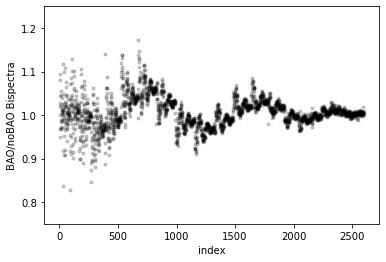

In [10]:
plt.scatter(np.arange(bk_bao.shape[0]), bk_bao[:, -1]/bk_nobao[:, -1], marker='.', color='k', alpha=0.2)
plt.ylim(0.75, 1.25)
plt.xlabel('index')
plt.ylabel('BAO/noBAO Bispectra')

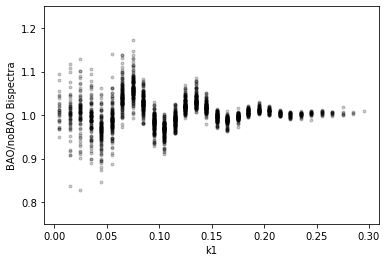

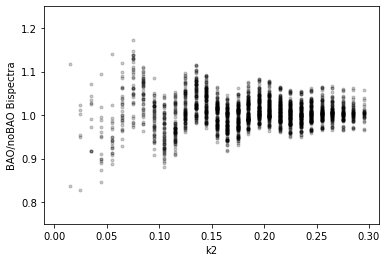

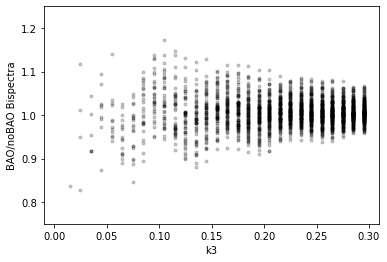

In [11]:
for i in range(3):    
    plt.scatter(bk_bao[:, i], bk_bao[:, -1]/bk_nobao[:, -1], marker='.', color='k', alpha=0.2)
    plt.ylim(0.75, 1.25)
    plt.xlabel(f'k{i+1}')
    plt.ylabel('BAO/noBAO Bispectra')
    plt.show()

In [ ]:
plt.scatter(

In [10]:
def get_cov(bk_nobao, bks, kmin=0.1, kmax=0.175):

    is_good = np.ones(bks.shape[1], '?')
    print(is_good.sum())

    for i in range(3):
        is_good &= (bk_nobao[:, i] > kmin) & (bk_nobao[:, i] < kmax)

    print(is_good.sum())    
    hartlapf = 1.0
    
    return np.cov(bks[:, is_good], rowvar=False)*hartlapf

In [11]:
cov = get_cov(bk_nobao, bks)

2600
84


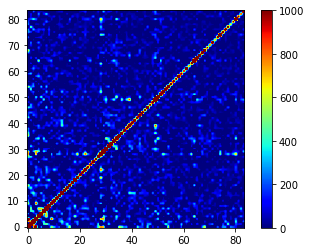

In [12]:
plt.imshow(cov, origin='lower', cmap='jet', vmin=0, vmax=1.0e3)
plt.colorbar()

In [13]:
k1, k2, k3 = bk_bao[:, :3].T

In [34]:
bkr = bk_bao[:, -1]/bk_nobao[:, -1]
bkr.shape

(2600,)

In [3]:
from scipy.interpolate import interpn
import numpy as np

def value_func_3d(x, y, z):
     return 2 * x + 3 * y - z

In [4]:
x = np.linspace(0, 4, 5)
y = np.linspace(0, 5, 6)
z = np.linspace(0, 6, 7)
points = (x, y, z)
values = value_func_3d(*np.meshgrid(*points, indexing='ij'))

In [44]:
np.unique(k1).size**3

27000

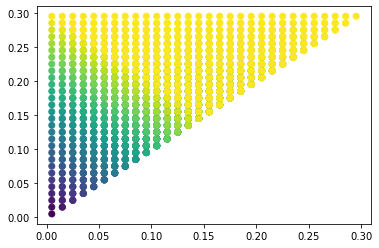

In [47]:
plt.scatter(k1, k2, c=k3)

(-10.0, 130.0)

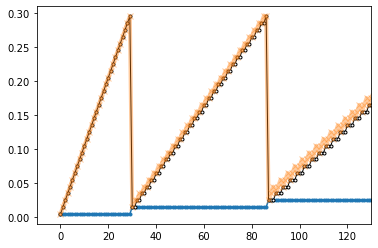

In [119]:
plt.plot(k1, marker='.')

plt.plot(k2, 'k-', lw=1, marker='.', mfc='w')
plt.plot(k3, lw=4, alpha=0.4, marker='x')

plt.xlim(-10, 130)

In [122]:
from mpl_toolkits.mplot3d import axes3d

In [145]:
np.percentile(bkr, [5, 95])

array([0.9526749 , 1.06385103])

Text(0.5, 0, 'k3')

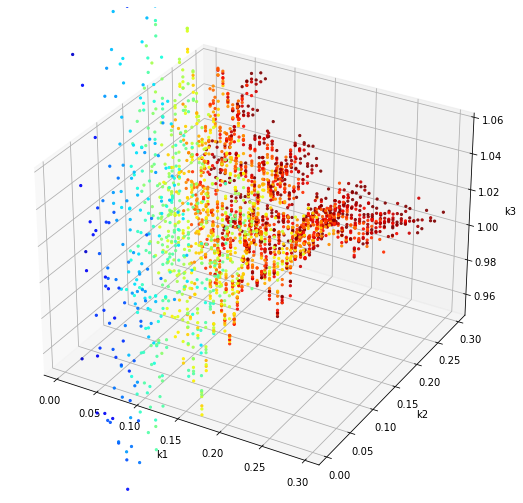

In [154]:
#fig = plt.figure(figsize=(10,6))
#ax = axes3d.Axes3D(fig, auto_add_to_figure=False, elev=30, azim=-40)
#fig.add_axes(ax)
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(projection='3d')

ax.scatter(k1, k2, bkr, c=k3, marker='.', cmap='jet', )#, vmin=0.95, vmax=1.06)
ax.set_zlim(0.95, 1.06)
ax.set_xlabel('k1')
ax.set_ylabel('k2')
ax.set_zlabel('k3')

In [155]:
help(ax.scatter3D)

Help on method scatter in module mpl_toolkits.mplot3d.axes3d:

scatter(xs, ys, zs=0, zdir='z', s=20, c=None, depthshade=True, *args, data=None, **kwargs) method of matplotlib.axes._subplots.Axes3DSubplot instance
    Create a scatter plot.
    
    Parameters
    ----------
    xs, ys : array-like
        The data positions.
    zs : float or array-like, default: 0
        The z-positions. Either an array of the same length as *xs* and
        *ys* or a single value to place all points in the same plane.
    zdir : {'x', 'y', 'z', '-x', '-y', '-z'}, default: 'z'
        The axis direction for the *zs*. This is useful when plotting 2D
        data on a 3D Axes. The data must be passed as *xs*, *ys*. Setting
        *zdir* to 'y' then plots the data to the x-z-plane.
    
        See also :doc:`/gallery/mplot3d/2dcollections3d`.
    
    s : float or array-like, default: 20
        The marker size in points**2. Either an array of the same length
        as *xs* and *ys* or a single value

In [14]:
from scipy.interpolate import RegularGridInterpolator

In [16]:
xg, yg ,zg = np.meshgrid(k1, k2, k3, indexing='ij', sparse=True)

In [21]:
intr = RegularGridInterpolator((k1, k2, k3), )

ValueError: There are 3 point arrays, but values has 1 dimensions

In [53]:
k1

array([0.005, 0.005, 0.005, ..., 0.285, 0.285, 0.295])

In [54]:
k2

array([0.005, 0.015, 0.025, ..., 0.285, 0.295, 0.295])

In [55]:
k3

array([0.005, 0.015, 0.025, ..., 0.295, 0.295, 0.295])

/tmp/ipykernel_45635/3868128893.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = axes3d.Axes3D(fig)


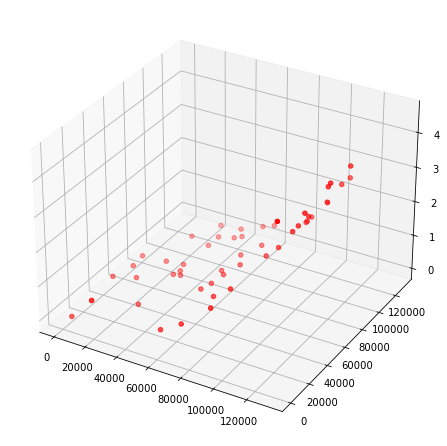

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

%matplotlib inline
import random
# set seed to reproducible
random.seed(1)
data_size = 51
max_value_range = 132651
x = np.array([random.random()*max_value_range for p in range(0,data_size)])
y = np.array([random.random()*max_value_range for p in range(0,data_size)])
z = 2*x*x*x + np.sqrt(y)*y + random.random()
fig = plt.figure(figsize=(10,6))
ax = axes3d.Axes3D(fig)
ax.scatter3D(x,y,z, c='r')

In [57]:
x_grid = np.linspace(0, 132651, 1000*len(x))
y_grid = np.linspace(0, 132651, 1000*len(y))
B1, B2 = np.meshgrid(x_grid, y_grid, indexing='xy')
Z = np.zeros((x.size, z.size))

import scipy as sp
import scipy.interpolate
spline = sp.interpolate.Rbf(x,y,z,function='thin_plate',smooth=5, episilon=5)

Z = spline(B1,B2)
fig = plt.figure(figsize=(10,6))
ax = axes3d.Axes3D(fig)
ax.plot_wireframe(B1, B2, Z)
ax.plot_surface(B1, B2, Z,alpha=0.2)
ax.scatter3D(x,y,z, c='r')

MemoryError: Unable to allocate 988. GiB for an array with shape (2601000000, 51) and data type float64

In [ ]:
def loglike(alpha, k, bk, cov):
    kn = k*alpha
    res = (bk - )
    return 

In [ ]:
## next
# run mcmc fiting for alpha (cov from the mocks, 3d interpolation)
# plot chi2 vs alpha 
# 2chi2 = -log(L) = (B(ak1, ...)-B(k1, ...))T C^-1 (....)
# repeat to check the constraining power wrt power spectrum

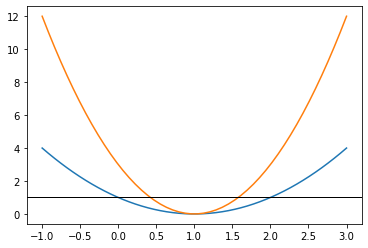

In [30]:
alpha = np.linspace(-1, 3)

plt.plot(alpha, (alpha-1)**2)
plt.plot(alpha, 3*(alpha-1)**2)

plt.axhline(1., lw=1, c='k')